## Visualisations apart from the circularplot - connectome plot, plot of the ROIs & matrix plot

In [2]:
# import necessary modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from nilearn.image import index_img
from nilearn.plotting import find_xyz_cut_coords
from nilearn import plotting, image

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


### Load mask and labels and get coordinates

In [3]:
# load the image and labels 
all_regions_img = image.load_img('/media/maria/Elements/Bipolife_BIDS/A1/code/maria_thesis/dmn_limbic_2903.nii.gz')
all_region_labels = np.load('/media/maria/Elements/Bipolife_BIDS/A1/code/maria_thesis/dmn_limbic_labels_2903.npy', allow_pickle= True)

## Create plots only for the significant connections regarding the effects group, IDSC score and YMRS score
### group

In [5]:
# the regions we want to keep from all possible regions because they are involved in the significant connections
keepers = ['Ventromedial prefrontal cortex','Posterior cingulate cortex','Dorsomedial prefrontal cortex anteromedial','Superior frontal sulcus anterior LH', 'Thalamus','Superior frontal sulcus RH','Superior frontal sulcus anterior RH','Hippocampus posterior LH','Hippocampus anterior RH']

In [6]:
# create a list of indices to get only the necessary labels
ind_list = []

for name in all_region_labels: 
    if name in keepers: 
    # get the index of the labels which are in keepers
        index = np.where(all_region_labels == name)[0][0]
        ind_list.append(index)
#ind_list

In [7]:
# getting the coords of the regions we are interested in
sel_coords = []
for i in ind_list:
    cur_img = index_img(all_regions_img, i)
    sel_coords.append(find_xyz_cut_coords(cur_img))

In [8]:
# setting the node colors
node_color_list = ['#CC6677','purple','#661100','#88CCEE','#DDCC77','#88CCEE','#88CCEE','seagreen','seagreen']

hc
nr
lr
hr
bd


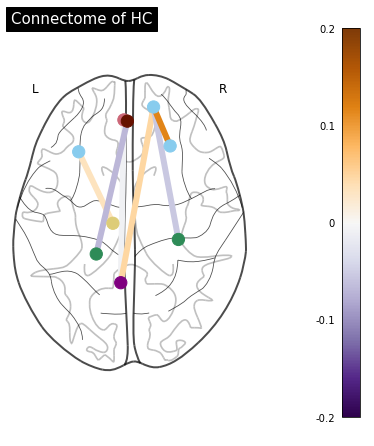

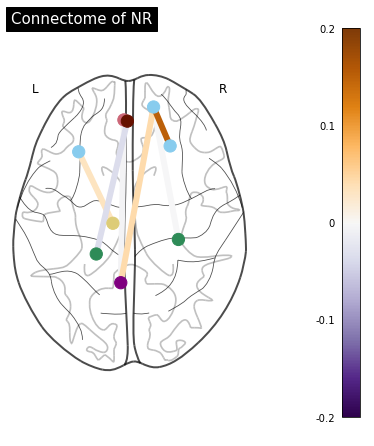

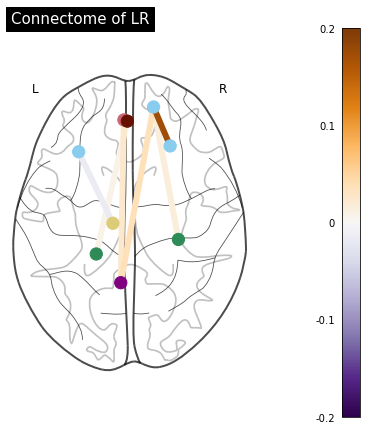

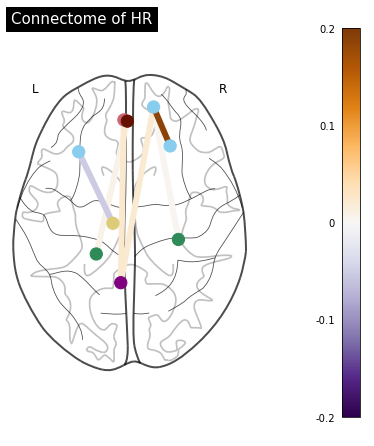

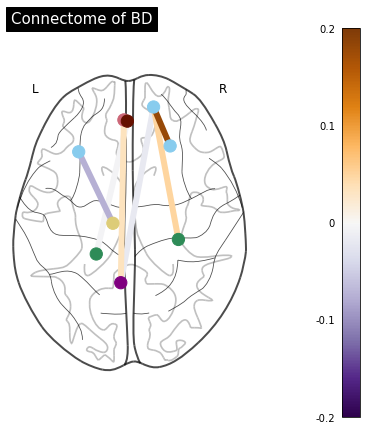

In [9]:
# loop over all groups to get a connectomeplot for every group
group_list = ['hc', 'nr', 'lr', 'hr', 'bd']
for group in group_list:
    
    print(group)
    name = group.upper()
    
    data_path = '/media/sf_shared_VB/Ma_results/'
    
    matrix = pd.read_csv(f'/media/maria/Elements/Bipolife_BIDS/A1/derivatives/connectivity_matrices/groups/kind-partial correlation/group-{group}/2903/group-{group}_atlas-difumo_kind-partial correlation_matrix_with labels_2903.csv', index_col=0)
    
    #minimize the matrix by onlay taking into account the regions of interest
    # throwing out all the rows of regions which are not included in keepers
    for i in matrix.index: 
        if i not in keepers:
            matrix = matrix.drop(labels=i, axis=0)
     # getting rid of all the columns of regions not included in keepers 
    selection = matrix[keepers]
    
    #for a more informative plot turn all values of no interest into zeros so the plot only shows the significant connections
    # connections of interest
    coi = [[0,1],[1,0],[1,6],[6,1],[3,4],[4,3],[2,7],[7,2],[5,6],[6,5],[6,8],[8,6]]
    
    # go through the whole matrix and turn the value of a connection to zero if the connection is not a coi
    for i in range(0,9):
        for j in range(0,9):
            if [i,j] not in coi: 
                selection.values[i,j] = 0
    # turn the matrix into a numpydarray 
    selection = selection.to_numpy()
    
    #  plot the connectome and save it as png image 
    fig = plt.figure(figsize=(5,6), facecolor = 'white')
    
    plotting.plot_connectome(selection,
                             node_coords = sel_coords,
                             node_size = 150,
                             node_color = node_color_list,
                             figure = fig,
                             edge_cmap = 'PuOr_r',
                             title=f'Connectome of {name}',
                             edge_vmin = -0.2,
                             edge_vmax = 0.2,
                             display_mode="z",
                             colorbar=True,
                             edge_kwargs = {'lw': 6.0})
    
    fname_fig = data_path + f'connectome_selection_{group}_newcolor2_final.png'
    fig.savefig(fname_fig)   

### IDSC score

In [10]:
keepers_idsc = ['Posterior cingulate cortex','Middle temporal gyrus LH','Parieto-occipital sulcus anterior','Anterior cingulate cortex','Superior frontal sulcus LH','Angular gyrus posterior LH','Parahippocampal gyrus LH','Parahippocampal gyrus RH','Pars triangularis LH','Superior frontal sulcus anterior LH2','Amygdala LH','Hippocampus anterior RH']

In [11]:
# create a list of indices to get only the necessary labels
ind_list_idsc = []
for name in all_region_labels: 
    if name in keepers_idsc: 
        index = np.where(all_region_labels == name)[0][0]
        ind_list_idsc.append(index)
#ind_list_idsc

In [12]:
# getting the coords of the regions we are interested in
sel_coords_idsc = []
for i in ind_list_idsc:
    cur_img = index_img(all_regions_img, i)
    sel_coords_idsc.append(find_xyz_cut_coords(cur_img))

In [13]:
# setting the node colors
node_color_list_idsc = ['purple','navy','darkorange','orangered','#88CCEE','sienna','gold','gold','fuchsia','#88CCEE','greenyellow','seagreen']

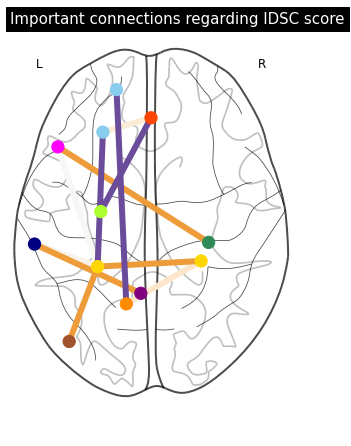

In [14]:
data_path = '/media/sf_shared_VB/Ma_results/'
    
matrix = pd.read_csv(f'/media/maria/Elements/Bipolife_BIDS/A1/derivatives/connectivity_matrices/groups/kind-partial correlation/group-hc/2903/group-hc_atlas-difumo_kind-partial correlation_matrix_with labels_2903.csv', index_col=0)

#minimize the matrix by onlay taking into account the regions of interest 
for i in matrix.index: 
    if i not in keepers_idsc:
        matrix = matrix.drop(labels=i, axis=0)
selection_idsc = matrix[keepers_idsc]

# for clarity turn all values of no interest into zeros so the plot only shows the important connections
# one list containing all significant connections
coi_idsc = [[0,1],[1,0],[4,6],[6,4],[5,6],[6,5],[6,7],[7,6],[2,9],[9,2],[11,8],[8,11],[3,10],[10,3]]
# one list of the connections with an increase of the partial correlation according to IDSC score
coi_rise_idsc = [[0,1],[1,0],[5,6],[6,5],[6,7],[7,6],[11,8],[8,11]]
# one list of the connections with a decrease of the partial correlation according to IDSC score
coi_fall_idsc = [[4,6],[6,4],[2,9],[9,2],[3,10],[10,3]]

for i in range(0,12):
    for j in range(0,12):
        if [i,j] not in coi: 
            selection_idsc.values[i,j] = 0
        # turning the connections with an increase orange
        if [i,j] in coi_rise_idsc:
            selection_idsc.values[i,j] = 0.5
        # turning the connections with a decrease purple
        if [i,j] in coi_fall_idsc:
            selection_idsc.values[i,j] = -0.7

selection_idsc = selection_idsc.to_numpy()

# plot the connectome and save it as png image 
fig = plt.figure(figsize=(4,6), facecolor = 'white')

plotting.plot_connectome(selection_idsc,
                         node_coords = sel_coords_idsc,
                         node_size = 150,
                         node_color = node_color_list_idsc,
                         figure = fig,
                         edge_cmap = 'PuOr_r',
                         title=f'Important connections regarding IDSC score',
                         display_mode="z",
                         edge_vmin = -1,
                        edge_vmax = 1,
                         edge_kwargs = {'lw': 6.0})

fname_fig = data_path + f'connectome_IDSC_final.png'
fig.savefig(fname_fig, bbox_inches = 'tight')   

### YMRS

In [15]:
keepers_ymrs = ['Middle temporal gyrus RH','Posterior cingulate cortex','Hippocampal fissure','Dorsomedial prefrontal cortex anteromedial','Parieto-occipital sulcus anterior','Anterior cingulate cortex','Ventromedial prefrontal cortex anterior', 'Thalamus','Superior frontal sulcus anterior LH2','Superior frontal sulcus anterior RH','Angular gyrus inferior RH','Hippocampus anterior RH']

In [16]:
# create a list of indices to get only the necessary labels
ind_list_ymrs = []
for name in all_region_labels: 
    if name in keepers_ymrs: 
        index = np.where(all_region_labels == name)[0][0]
        ind_list_ymrs.append(index)
#ind_list

In [17]:
# getting the coords of the regions we are interested in
sel_coords_ymrs = []
for i in ind_list_ymrs:
    cur_img = index_img(all_regions_img, i)
    sel_coords_ymrs.append(find_xyz_cut_coords(cur_img))

In [18]:
# setting the node colors
node_color_list_ymrs = ['navy','purple','deeppink','#661100','darkorange','orangered','#CC6677','#DDCC77','#88CCEE','#88CCEE','sienna','seagreen']

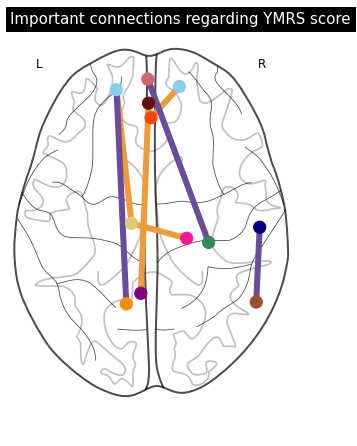

In [19]:
data_path = '/media/sf_shared_VB/Ma_results/'
    
matrix = pd.read_csv(f'/media/maria/Elements/Bipolife_BIDS/A1/derivatives/connectivity_matrices/groups/kind-partial correlation/group-hc/2903/group-hc_atlas-difumo_kind-partial correlation_matrix_with labels_2903.csv', index_col=0)

#minimize the matrix by onlay taking into account the regions of interest 
for i in matrix.index: 
    if i not in keepers_ymrs:
        matrix = matrix.drop(labels=i, axis=0)
selection_ymrs = matrix[keepers_ymrs]

# for clarity turn all values of no interest into zeros so the plot only shows the important connections
# one list containing all significant connections
coi_ymrs = [[0,10],[10,0],[1,3],[3,1],[2,7],[7,2],[4,8],[8,4],[5,9],[9,5],[11,6],[6,11],[7,8],[8,7]]
# one list of the connections with an increase of the partial correlation according to YMRS score
coi_rise_ymrs = [[1,3],[3,1],[2,7],[7,2],[5,9],[9,5],[7,8],[8,7]]
# one list of the connections with a decrease of the partial correlation according to YMRS score
coi_fall_ymrs = [[0,10],[10,0],[4,8],[8,4],[11,6],[6,11]]

for i in range(0,12):
    for j in range(0,12):
        if [i,j] not in coi_ymrs: 
            selection_ymrs.values[i,j] = 0
        # turning the connections with an increase orange
        if [i,j] in coi_rise_ymrs:
            selection_ymrs.values[i,j] = 0.5
        # turning the connections with a decrease purple
        if [i,j] in coi_fall_ymrs:
            selection_ymrs.values[i,j] = -0.7

selection_ymrs = selection_ymrs.to_numpy()

fig = plt.figure(figsize=(4,6), facecolor = 'white')
# plot the connectome and save it as png image 
plotting.plot_connectome(selection_ymrs,
                         node_coords = sel_coords_ymrs,
                         node_size = 150,
                         node_color = node_color_list_ymrs,
                         figure = fig,
                         edge_cmap = 'PuOr_r',
                         title=f'Important connections regarding YMRS score',
                         display_mode="z",
                         edge_vmin = -1,
                        edge_vmax = 1,
                         edge_kwargs = {'lw': 6.0})

fname_fig = data_path + f'connectome_ymrs_final.png'
fig.savefig(fname_fig, bbox_inches = 'tight')   